In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Nebular HII regions

We will explore the physics of photoionized regions, which are seen surrounding newly formed stars or white dwarfs.

### 1. Strömgren sphere of ionized gas surrounding a massive star

Consider a newly formed massive star radiating a total ionizing ($h\nu > 13.6 \, \rm eV$) photon rate of $Q_*$, which is surrounded by a medium with constant hydrogen number density $n_H$. 

Assume that within some spherical volume (the "Strömgren sphere"), the hydrogen atoms absorb (and are ionized by) every single one of these photons, resulting in an entirely ionized gas, while outside of this volume the gas is entirely neutral. By setting the ionization and recombination rates equal within that volume, calculate its radius $R_{\rm st}$ (the "Strömgren radius"). 

a) If every single ionizing photon is absorbed inside the Strömgren sphere, what is the total ionization rate? (Units of $s^{-1}$)

The total ionization rate is Q_* because all the photons are being absorbed, per unit time. It is absorbing at the 13.6 eV energy.


b) Inside that volume, what is the total recombination rate? (Units of $s^{-1}$)

recomb_rate = (Q_*/V) which is per unit volume which means that ionization rate must also be per unit volume to be able to equate them together.

By setting the ionization and recombination rates equal, derive the size of the ionized region and solve for the Strömgren radius. You can write the result in terms of the hydrogen recombination coefficient, $\alpha_H$. Do your scalings of the Strömgren radius with $Q_*$ and $n_H$ make sense?

r_strom = (3Q/(4pia(n_H)^2))^(1/3)

### 2. Typical size of a photoionized nebula

Assuming a star of effective (surface) temperature $T = 3\times10^4$ K and radius $R = 2\times10^{11}$ cm, use the approximate expression from the pre-lab video to calculate the integrated ionizing photon rate $Q_*$ for hydrogen, with ionization energy of $h \nu_i = 13.6$ eV.

Then assuming $n_H = 10^2 \, \rm cm^{-3}$ and $\alpha_H = 3.3\times10^{-13} \, \rm cm^3 \, \rm s^{-1}$, calculate the Strömgren radius in cm. How large is the ionized nebula compared to the size of the massive star? How about compared to the width of a Galactic spiral arm of $\simeq 1$ kpc?


In [5]:
# calculating Q_*

T = 3e4 #K
R = 2e11 #cm
h_vi = 2.179e-11 #erg
n_H = 1e2 #cm^3
a_H = 3.3e-13 #cm^3/s
c = 3e10 #cm/s
k = 1.38e-16 # gcm^2/s^2K
h = 6.626e-27 #erg s
u_i = ((h_vi)/(k*T))
term1 = ((8*(3.14**2)*(R**2))/c**2)
term2 = (k*T/h)**3
term3 = 2+2*(u_i)+(u_i)**2
term4 = (2.718)**(-u_i)

Q = (term1)*(term2)*(term3)*(term4)

print(Q, "ergs")

# calculating r_strom

r_strom = ((3*Q)/(4*3.14*(a_H)*((n_H)**2)))**(1/3)
print (r_strom, "cm")

# the stars strom radius is 2.345e18 cm which is equivalent to 7.6e-22 kpc, this is larger than the radius of the star which is 2e11 cm. The length 
# of a galactic spiral is about 1 kpc which is much larger than the radius. This is reasonable because many nebula populate the galaxy and if the 
# nebula were too large it would not be the same.

1.7822608893834952e+47 ergs
2.3452887344507715e+18 cm


### 3. Thickness of the transition from ionized to neutral

The thickness of the boundary where the gas goes from nearly fully ionized to neutral can be estimated as the mean free path of an ionizing photon in the neutral region. Using $\sigma_0 = 6.3 \times 10^{-18} \, \rm cm^2$, calculate this width and compare with your value of $R_{\rm st}$ from part 2.

How does the result compare to the assumption above of a very sharp transition from fully ionized to neutral gas?

In [6]:
sigma_0 = 6.3e-18 # cm^2
mean_free_path = (1/((n_H)*sigma_0))
ratio = (mean_free_path/r_strom)

print(mean_free_path, "cm")
print(ratio)

# Our result shows a sharp transition, which is because our mean free path equation is based on a large assumption shown above. The ratio between
# the mean free path and r_st is small. To clarify - r_strom is the Stromgren radius which represents the ionizing photon region and the 
#mean_free_path is the mean free path which is the neutral region

1587301587301587.0 cm
0.0006768043371313542


### 4. Relative size of hydrogen and helium ionization zones

Using the Strömgren sphere model, calculate the ratio of the radius of a helium to hydrogen ionization zone in terms of their relative number of ionizing photons $Q_{\rm H}$ and $Q_{\rm He}$ and composition parameters $X$ and $Y$.

Calculate this ratio for the first ionization state of helium for the assumed massive star properties above, with $n_H = 10^2$ cm$^{-3}$, $X = 3/4$, $Y = 1/4$, and noting that the helium ionization energy is $h \nu_i = 24.6$ eV.

In [12]:
n_H = 1e2 #cm ^ -3
X = (3/4)
Y = (1/4)
hv_He = 3.94e-11 # equivalent to 24.6 erg

u_iHe = ((hv_He)/(k*T))
t_1 = ((8*(3.14**2)*R**2))/(c**2)
t_2 = (((k*T)/h)**3)
t_3 = 2.718**(-u_iHe)
t_4 = (2 + 2*(u_iHe) + (u_iHe)**2)

Q_h = (t_1)*(t_2)*(t_3)*(t_4)
print(Q_h, "sec^-1")

r_stromHe = ((3*Q_h)/(4*(a_H)*3.14*((n_H)**2)))**(1/3)
print(r_stromHe, "cm")

ratio = (X*(r_strom))/(Y*(r_stromHe))
print(ratio)

# We can see from the 8.8:1 ratiothat the radius of the hydrogen ionization zone (in terms of relative number of ionizing photons) is around
# 8.8 times larger for H. This checks out since as stars start to burn He their cores tend to contract.

7.030502390006244e+45 sec^-1
7.983647349471085e+17 cm
8.812846929941662


### 5. Comparison to output from a numerical calculation with the Cloudy code

Compare your results with the same problem as run using the Cloudy photoionization code, which tracks in detail the ionization state and temperature of the nebula. 

1) Fill in your values for the Strömgren radius below to plot your expected locations for a drop from full to zero ionization on the plot below.

2) How well does the Strömgren sphere assumption work? e.g., what is the fractional error in the Strömgren radius compared to the size from the Cloudy calculation?

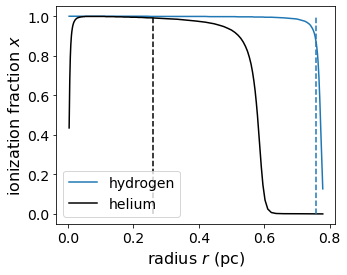

In [15]:
# FILL IN YOUR VALUES FOR RSTROM HERE
rstrom_H = 2.345e18 # cm
rstrom_He = 7.983e17 # cm

# load Cloudy output data
r,xH,xHe,xHe2 = np.load('cloudy_hii_example_Rx.npy')

# make a plot of ionization fractions
plt.figure(figsize=(5,4))
plt.plot(r/3.09e18,xH,label='hydrogen',color='C0')
plt.plot(r/3.09e18,xHe,label='helium',color='k')
plt.plot(rstrom_H/3.09e18+np.zeros(50),np.arange(50)/49.,color='C0',linestyle='--')
plt.plot(rstrom_He/3.09e18+np.zeros(50),np.arange(50)/49.,color='k',linestyle='--')
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.xlabel('radius $r$ (pc)',fontsize=16); plt.ylabel(r'ionization fraction $x$',fontsize=16)
plt.legend(frameon=True,fontsize=14)
# Our calculated radius value aligns with the ionization fraction values for hydrogen, which means we can conclude that the Stromgren sphere
# assumption was pretty accurate (for Hydrogen as the dotted line). 

### 6. Nebular spectrum

Cloudy also calculates the observed spectrum from the nebula, including both the initial stellar spectrum (here a Planck spectrum $B_\nu (T)$ with $T = 3\times10^4$ K) and the additional radiation from the ionized gas in the nebula.

What are the major differences between the incident (stellar) spectrum, and the observed one from the entire nebula? Why is the high energy flux of the star greatly reduced in the observed spectrum? Where did that energy go?

(1000000000000.0, 2e+16)

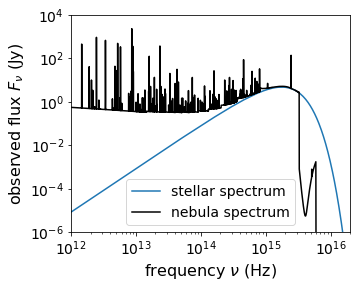

In [16]:
# load Cloudy output data
nu,Fnu_trans,Fnu_diff,Fnu_inc = np.load('cloudy_hii_example_spec.npy')

# make a plot of the stellar (blue) and observed (black) spectra
plt.figure(figsize=(5,4))
plt.loglog(nu,Fnu_inc,label='stellar spectrum',color='C0')
plt.loglog(nu,Fnu_trans,label='nebula spectrum',color='k')
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.xlabel(r'frequency $\nu$ (Hz)',fontsize=16); plt.ylabel(r'observed flux $F_\nu$ (Jy)',fontsize=16)
plt.legend(frameon=True,fontsize=14)
plt.ylim(1e-6,1e4); plt.xlim(1e12,2e16)

In [ ]:
# There are a few more major differences between the spectra. Mainly - there is not a defined shape for the nebula spectrum and the sheer 
# contrast of the data. When looking at the stellar spectrum, we can see that it's shape follows a parabola and has an apex at 10^15 Hz compared
# to the nebula spectrum which has more points of maximums and minimums and eventually drops from 10^15 Hz to a tiny flux. These differences in 
# shape can be attributed to the way nebulas are visible due to the embedding of hot stars that populate their clusters which are made of ionized
# gas. Compare to other nebulas - which are so diffused that the observed flux is much lower and the density of their star clusters are quite
# low. The energy is always converting from gravitational potential energy to kinetic energy which eventually dissipates and is all absorbed 
# and dispersed through the layers of gas. This distortes the recieved flux.